In [1]:
# sets the path to the root of the repository
from pathlib import Path
import sys
import os

root_path = os.path.dirname(os.path.abspath(''))
sys.path.append(str(root_path))
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from prediction_head.data import get_regression_dataset, get_binary_dataset, get_multiclass_dataset, get_multilabel_dataset, get_zeroinflated_dataset, TaskType
from prediction_head.GLM import GLM, train_one_epoch, train_loop, TaskSpec
from prediction_head.plot import plot_regression_distribution, plot_classification_distribution, plot_ground_truth_vs_predictions


## Binary (n_features=25, n_informative=20, n_redundant=5)

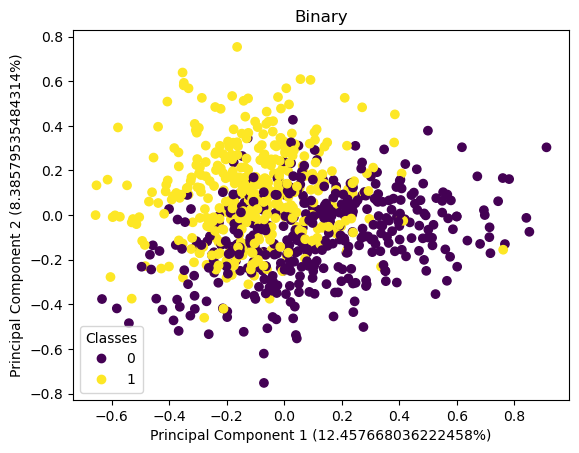

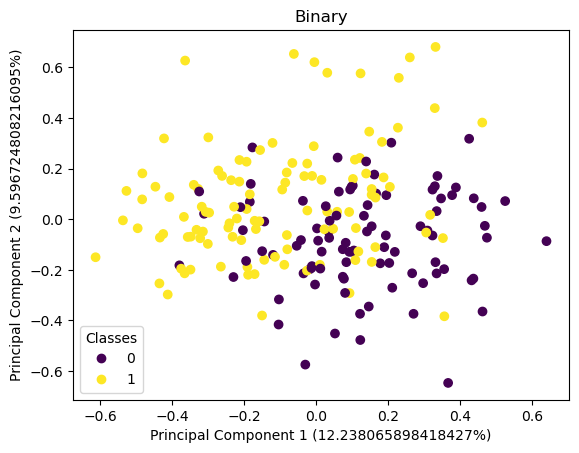

name='binary'
{'roc': 0.5383378554919104, 'acc': 0.535}


In [2]:
dataloaders: dict = {TaskType.binary: get_binary_dataset(n_features=25, n_informative=20)}
task_specs = [TaskSpec("binary", 1, TaskType.binary)]
train_dataloader = dataloaders[TaskType.binary][0]
test_dataloader = dataloaders[TaskType.binary][1]
scaler = dataloaders[TaskType.binary][2]
# plot data (train)
plot_classification_distribution(np.array(train_dataloader.dataset.x), np.array(train_dataloader.dataset.y), title="Binary", xlabel="Principal Component 1", ylabel="Principal Component 2")
# plot data (test)
plot_classification_distribution(np.array(test_dataloader.dataset.x), np.array(test_dataloader.dataset.y), title="Binary", xlabel="Principal Component 1", ylabel="Principal Component 2")
# run ML model
results = train_loop(25, task_specs, dataloaders, epochs=10)
print(results["binary"][0])